## Reading segY seismic files with obspy

Corresponding obspy documentation can be found at:

    https://docs.obspy.org/packages/autogen/obspy.io.segy.segy._read_segy.html

Each file has a general form of T traces, where the i-th trace can be accessed in segyfile.traces[i]. Each trace has N samples that are accessed in segyfile.traces[i].data and the j-th data point is accessed in segyfile.traces[i].data[j]. N is such that $N = n\Delta_y$, where $\Delta_y$ is the is the size of the y-dimension.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from obspy.io.segy import segy
import urllib
import numpy as np

Reading the data:

In [2]:
segyfile = segy._read_segy('/Users/mviana/Documents/IBMProjects/Seismic/SegY2TifConv/PSDM_IL1500_2600_XL_3100_6500_time.sgy')

Number of traces:

In [3]:
len(segyfile.traces)

3744501

Number of samples:

In [4]:
segyfile.traces[0].data.shape[0]

2001

Number of traces and we want to explore:

In [108]:
ntraces = 3401#len(segyfile.traces)
nsamples = len(segyfile.traces[0].data)

Image creation:

In [109]:
mtraces = np.zeros((nsamples, ntraces))
mtraces.shape

(2001, 3401)

In [110]:
for i in range(ntraces):
    mtraces[:nsamples, i] = segyfile.traces[i].data[:nsamples]

In [111]:
mtraces.shape

(2001, 3401)

Scalar range:

In [112]:
srange = [np.min(mtraces),np.max(mtraces)]
print(srange)

[-294392.1875, 390477.875]


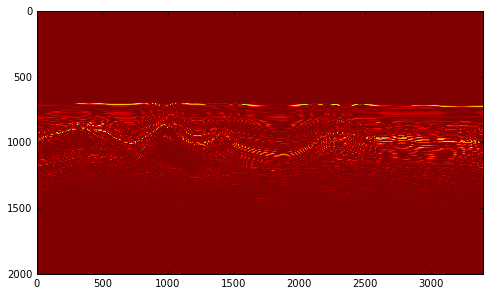

In [113]:
plt.figure(num=None, figsize=(8, 20), dpi=120, facecolor='w', edgecolor='k')
imgplot = plt.imshow(mtraces, vmin=srange[0], vmax=0*srange[1])

Determing the number of traces:

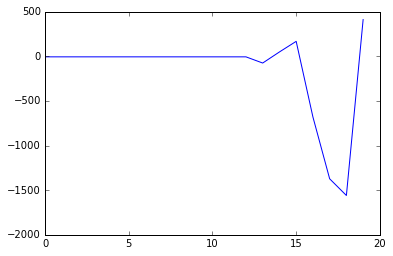

In [114]:
plt.plot(mtraces[700:720,3400])

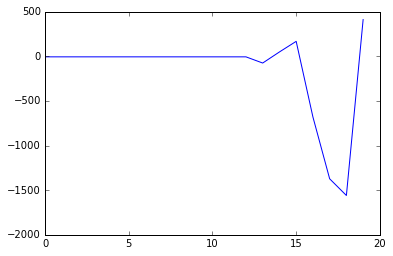

In [117]:
plt.plot(mtraces[700:720,3400])

In [118]:
segyfile.binary_file_header

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 1
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 4000
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 2001
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 1
	ensemble_fold: 1
	trace_sorting_code: 0
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

Number of images:

In [119]:
len(segyfile.traces)/3401

1101.0

In [120]:
from PIL import Image

In [121]:
im = Image.fromarray(mtraces)
im.save('/Users/mviana/Documents/IBMProjects/Seismic/SegY2TifConv/temp.tif')